# Week 8 - Link Analysis

This week, we are going to work with link analysis

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate
import tqdm

import sys
sys.path.append('../utilities')
from utilities.load_data import load_dblp_citations

Below, we have included some code to plot the karate graph.

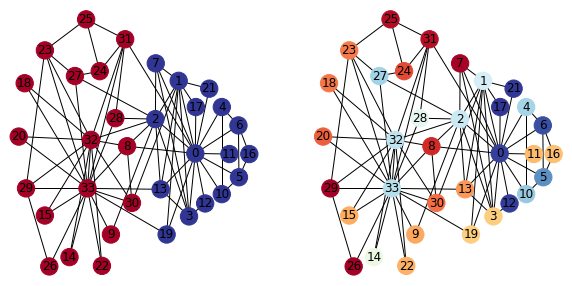

In [32]:
def plot_karate(G, pr=[], ax=None, cmap=plt.get_cmap('RdYlBu')): 
    fixed_positions = {0:(10.74,4.07),1:(9.76,6.48),2:(8.39,5.21),3:(10.37,1.98),4:(12.30,5.61),5:(13.31,3.28),6:(13.28,5.00),7:(8.41,7.06),8:(6.72,4.31),9:(5.77,1.38),10:(12.30,2.72),11:(12.75,4.05),12:(11.32,2.41),13:(8.70,2.88),14:(3.33,0.63),15:(1.88,2.01),16:(13.92,4.05),17:(10.77,5.61),18:(0.69,6.40),19:(9.05,1.38),20:(0.34,4.63),21:(11.56,6.22),22:(5.24,0.34),23:(1.88,7.49),24:(5.11,6.80),25:(4.31,8.52),26:(2.14,0.32),27:(3.65,6.64),28:(6.03,5.24),29:(0.77,2.91),30:(7.01,2.43),31:(6.61,7.86),32:(4.60,4.52),33:(4.39,2.91)}
    if len(pr) :
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax, cmap=cmap, node_color=pr)
    else : 
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax)

G = nx.karate_club_graph()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
magic_cut = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_karate(G, magic_cut, ax=ax[0])
plot_karate(G, np.random.rand(G.order()), ax=ax[1])

## Exercise 1 - Random walks and PageRank

Many embedding methods rely on random walks to capture the structure of the neighbors of a node. Random walks are tightly connected to the Pagerank as a limit of convergence in performing random walks on a graph. 

In this theoretical exercise we will reason about PageRank and its properties. Remember that the Personalized Pagerank in a undirected graph can be experssed by the equation 
$$
\mathbf{r} = \alpha M\mathbf{r} - (1-\alpha)\mathbf{p} 
$$
where $M = A^\top \Delta^{-1}$ is the transition matrix, $\mathbf{p}$ is called the restart vector and represents the starting nodes of the random walk where the walker will jump back with probability $(1-\alpha)$. 

Let us assume $\alpha = 0.85$ and $\mathbf{p} = \frac{1}{n}\mathbf{1}_n$ is uniformly distributed where $\mathbf{1}_n$ is the $n$-dimensional vectors with all 1s. 

1. (Warm up) Argue why $M = A^\top \Delta^{-1}$ makes sense as a transition matrix. 

2. What is the PageRank of a circle of $n$ nodes?

3. A [path graph](https://en.wikipedia.org/wiki/Path_graph) is a graph where each node is connected to the consecutive. What is the PageRank with 3 nodes when $\alpha=1$? 
**Hint**: Remember that the elements in the PageRank vector sum to 1 (it's a distribution over nodes). 

4. Consider a complete directed bipartite graph (with self loops) consisting of 3 hubs and 2 authorities:  
![hubs_and_authorities](graphics/bipartite_1.png)
    1. Write the adjacency matrix of the system, and normalize it for use with the PageRank algorithm.
    2. What is the PageRank score of the nodes in the system? Provide both an analytical proof and an intuitive explanation. Assume no damping factor.
    3. Now add a link from one of the authorities to one of the hubs. What is the PageRank score of the nodes now? Provide both an analytical proof and an intuitive explanation. 


5. Prove the following statement:
In an undirected and connected graph, $G(V,E)$, the stationary distribution of a random walk is proportional to the nodes' degrees.

In other words, for a transition matrix $ M $, in which 
$$
    M(u, v) = \left\{ 
    \begin{matrix}
    \frac{1}{d_u}&\text{, if }(u, v) \in E\\ 
    0&\text{, otherwise}
    \end{matrix}
    \right.
$$
and a stationary distribution $\pi$, such that $\pi = M\pi$, prove that probability $\pi_i$ is proportional to $d_i$, the number of edges incident on note $i$.


#### Solutions
**1**: Really easy, it comes from the definition. $M = (\Delta^{-1}A)^\top$

**2**: For a circle, $\Delta = 2I$ is the identity, so $M  =  \frac{1}{2}A^\top$ and so every node will be the average of its two neighbors. Due to symmetry, everyone will have the same Pagerank $\frac{1}{\text{\# nodes}}$.

**3**: The number of solutions are infinite if we don't consider the sum of PageRank values to 1. Let's take the graph with three nodes x--y--z, where x is connected to y and y is connected to z


Let's start from matrix
$$A = 
\left[\begin{array}{ccc}0 & 1 & 0 \\\
1 & 0 & 1 \\\
0 & 1 & 0
\end{array}\right]
$$

the transition matrix 
$$
M^T = \left[\begin{array}{ccc}0 & 1/2 & 0 \\\
1 & 0 & 1 \\\
0 & 1/2 & 0
\end{array}\right]
$$

the pagerank equation and $\alpha=1$ provides a handy way to solve the problem. Let $p=\left[\begin{array}{c}x\\\ y\\\ z
\end{array}\right]
$
using the equation above we can solve the system

$$
\left\{
\begin{array}{l}
x = 1/2y\\\
y = x+z\\\
z = 1/2y\\\
x + y + z = 1
\end{array}
\right. = \dots = 
\left\{
\begin{array}{l}
x = 1/4\\\
y = 1/2\\\
z = 1/4
\end{array}
\right.
$$
so in the end $p=\left[\begin{array}{c}0.25\\\ 0.5\\\ 0.25 \end{array}\right]$

    
**4**: 
**A)**  
$$
A=\left(\begin{array}{ccccc}
1 & 0 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 & 1 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1
\end{array}\right) \quad L=\left(\begin{array}{ccccc}
1 / 3 & 0 & 0 & 1 / 3 & 1 / 3 \\
0 & 1 / 3 & 0 & 1 / 3 & 1 / 3 \\
0 & 0 & 1 / 3 & 1 / 3 & 1 / 3 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1
\end{array}\right)
$$

**B)** We must find the principal eigenvector, corresponding to eigenvalue 1 of matrix $A^T$:
$$
L^\top v = v
$$
Let us make the system explicit:
$$
\begin{aligned}
&v_{1}=\frac{1}{3} v_{1}\\
&\begin{aligned}
v_{2} &=\frac{1}{3} v_{2} \\
v_{3} &=\frac{1}{3} v_{3} \\
v_{4} &=\frac{1}{3}\left(v_{1}+v_{2}+v_{3}\right)+v_{4} \\
v_{5} &=\frac{1}{3}\left(v_{1}+v_{2}+v_{3}\right)+v_{5}
\end{aligned}
\end{aligned}
$$

Therefore, principal eigenvectors are of the form $(0, 0, 0,v_4,v_5)$. 
The vector must be normalised, so that $v_4 + v_5 = 1$, and by symmetry considerations we get the final score: 
$$
(0, 0, 0, 1/2, 1/2).
$$

By intuition, after one step (at most) the user will be trapped in one of the authorities, and will never go back;
thus, the PageRank score of the hubs is 0 (after a transient period the user will never visit them). By symmetry,
the probability of the user being in any authority is equal.

**C)** The adjacency matrix (and its normalization) becomes:
$$
A^{\prime}=\left(\begin{array}{ccccc}
1 & 0 & 0 & 1 & 1 \\
0 & 1 & 0 & 1 & 1 \\
0 & 0 & 1 & 1 & 1 \\
1 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1
\end{array}\right) \quad L^{\prime}=\left(\begin{array}{ccccc}
1 / 3 & 0 & 0 & 1 / 3 & 1 / 3 \\
0 & 1 / 3 & 0 & 1 / 3 & 1 / 3 \\
0 & 0 & 1 / 3 & 1 / 3 & 1 / 3 \\
1 / 2 & 0 & 0 & 1 / 2 & 0 \\
0 & 0 & 0 & 0 & 1
\end{array}\right)
$$

The eigenvector equation 
$$
 L^{\prime\top}v = v
$$
becomes:
$$
\begin{aligned}
v_{1} &=\frac{1}{3} v_{1}+\frac{1}{2} v_{4} \\
v_{2} &=\frac{1}{3} v_{2} \\
v_{3} &=\frac{1}{3} v_{3} \\
v_{4} &=\frac{1}{3}\left(v_{1}+v_{2}+v_{3}\right)+\frac{1}{2} v_{4} \\
v_{5} &=\frac{1}{3}\left(v_{1}+v_{2}+v_{3}\right)+v_{5}
\end{aligned}
$$

Therefore, principal eigenvectors are of the form $(0, 0, 0, 0, v_5)$, and by normalization we get the final score:
$(0, 0, 0, 0, 1)$.
By intuition, sooner or later the user will be trapped in the pure authority, and will never go out.

**5**: Consider a transition matrix $P$ as follows:
$$
P = \left[ \begin{matrix}
    0             & \frac{1}{d_1} & 0             & \dots  & \frac{1}{d_1} \\
    \frac{1}{d_2} & 0             & \frac{1}{d_2} & \dots  & 0 \\
    0             & \frac{1}{d_3} & 0             & \dots  & 0 \\
    \vdots        &               &               & \ddots &   \\
    \frac{1}{d_n} &    0          & 0             &        &   
    \end{matrix}
    \right]
$$
where $d$ is a vector with entry $d_i$ being the degree of node $i$.
Observe that $P$ is symmetric in terms of zero and non-zero entries, i.e., if $P_{ij} = 0$ then so is $P_{ji}$ and if $P_{ij} \geq 0$ then so is $P_{ji}$.

The claim is now that $\pi \propto d$ for the stationary distribution, i.e., $\pi = c \cdot d$ for some constant $c$.
Let's try to set up the system and see what happens.

$$
 \pi = c\cdot d = \pi P = \left[ cd_1 ~ cd_2 ~ \dots ~ cd_n \right]\left[ \begin{matrix}
    0             & \frac{1}{d_1} & 0             & \dots  & \frac{1}{d_1} \\
    \frac{1}{d_2} & 0             & \frac{1}{d_2} & \dots  & 0 \\
    0             & \frac{1}{d_3} & 0             & \dots  & 0 \\
    \vdots        &               &               & \ddots &   \\
    \frac{1}{d_n} &    0          & 0             &        &   
    \end{matrix}
    \right]
    = \left[ \underbrace{(c + \dots + c)}_{\text{``}d_1\text{ times''}} ~ \dots ~ \underbrace{(c + \dots + c)}_{\text{``}d_n\text{ times''}}\right]
    = \left[ cd_1 ~ cd_2 ~ \dots ~ cd_n \right]
$$

So $\pi$ is proportional to $d$.

A final detail is that we need $\sum_{i=1}^n \pi_i = 1$, so we need to choose $c$ carefully. 
We observe that $\sum_{i=1}^n d_i = 2m$, where $m$ is the number of edges.
So
$$
\sum_{i=1}^{n} \pi_i = \sum_{i=1}^n cd_i = c \sum_{i=1}^n d_i = 1 \Rightarrow c = \frac{1}{2m}
$$


## Exercise 2 - Implementing PageRank

1. Provide an implementation of PageRank using the Power Iteration method below and run it on the karate graph, and the graphs discussed in exercise 1.
2. Check your code below. Why does the method fail for two of the graphs when $\alpha = 1$?

In [46]:
from networkx.algorithms import bipartite

# Tolerance is the sum of the absolute differences among the pagerank vectors in consequent iterations
# The iteration stops is the the differences are less than the tolerance
def my_pagerank(G, alpha = 0.85, p = None, max_iter = 100, tol=1e-06) : 
    A = nx.adjacency_matrix(G)
    n = G.number_of_nodes()
    r = np.full(n, 1/n)

    if p is None : 
        p = np.full(n, 1/n)

    ### YOUR CODE HERE    
    W = np.array(A/A.sum(axis=1)).T
    # Correct division by 0 
    W = np.nan_to_num(W)
    
    i = 0
    er = 1
                
    while i < max_iter and er > tol : 
        prev_r = r        
        r = alpha * W @ prev_r + (1-alpha) * p
        er = np.sum(abs(r - prev_r))
        i += 1
    ### YOUR CODE HERE
    return r


# simple helper function to simplify comparing nx pagerank with your own pagerank
def change_nx_format(nx_pagerank):
    keys = sorted(nx_pagerank.keys())
    return np.array([nx_pagerank[i] for i in keys])
    
    
alpha=.85  # Try different values (including 1)

G_karate = nx.karate_club_graph()
print('Pagerank karate graph')
print("nx:\n", change_nx_format(nx.pagerank_numpy(G_karate, alpha=alpha)))
print("my:\n", my_pagerank(G_karate, alpha=alpha))
print()

G_circle = nx.circulant_graph(10, [1])
print('Pagerank circulant graph')
print("nx:\n", change_nx_format(nx.pagerank_numpy(G_circle, alpha=alpha)))
print("my:\n", my_pagerank(G_circle, alpha=alpha))
print()

G_path = nx.path_graph(3)
print('Pagerank path graph')
print("nx:\n", change_nx_format(nx.pagerank_numpy(G_path, alpha=alpha)))
print("my:\n", my_pagerank(G_path, alpha=alpha, max_iter=1000))
print()

G_biparte = nx.DiGraph()
G_biparte.add_edges_from([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)])
print('Pagerank hubs and authorities graph')
print("nx:\n", change_nx_format(nx.pagerank_numpy(G_biparte, alpha=alpha)))
print("my:\n", my_pagerank(G_biparte, alpha=alpha, max_iter=1000))

print() 
print("Matrix solve with tiny damping")
A = np.array(nx.adjacency_matrix(G_biparte).todense())
W = (A / np.sum(A, 1, keepdims=True)).T

d = 0.99
n = G_biparte.order()

print("damping factor: %.2f" % d)
P = np.linalg.inv(np.eye(n) - d * W) @ ((1-d) * np.ones((n, 1)) / n)
print(P)

Pagerank karate graph
nx:
 [0.1025641  0.05769231 0.06410256 0.03846154 0.01923077 0.02564103
 0.02564103 0.02564103 0.03205128 0.01282051 0.01923077 0.00641026
 0.01282051 0.03205128 0.01282051 0.01282051 0.01282051 0.01282051
 0.01282051 0.01923077 0.01282051 0.01282051 0.01282051 0.03205128
 0.01923077 0.01923077 0.01282051 0.02564103 0.01923077 0.02564103
 0.02564103 0.03846154 0.07692308 0.10897436]
my:
 [0.10256478 0.0576925  0.06410255 0.0384617  0.01923103 0.02564142
 0.02564142 0.02564113 0.03205122 0.01282047 0.01923103 0.0064103
 0.01282059 0.03205134 0.01282042 0.01282042 0.01282074 0.01282059
 0.01282042 0.0192308  0.01282042 0.01282059 0.01282042 0.03205103
 0.01923064 0.01923063 0.01282041 0.02564087 0.01923069 0.02564082
 0.02564094 0.03846136 0.07692258 0.10897373]

Pagerank circulant graph
nx:
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
my:
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Pagerank path graph
nx:
 [0.25 0.5  0.25]
my:
 [0.33333333 0.33333333 0.33333333]

Pag

#### Solution:
**7**: This is one of the problems if $\alpha = 1$, the power iteration method might not converge, unfortunately. Check with nx.pagerank instead of nx.pagerank_numpy to see the difference. 

## Exercise 3 - HITS
Your task is to implement your own version of the HITS algorithm. 
You may consult this [link](https://www.geeksforgeeks.org/hyperlink-induced-topic-search-hits-algorithm-using-networxx-module-python/). 

Apply your HITS algorithm on the karate network, to discover hubs and authorities.

Make sure to normalize your matrix after every iteration, to ensure that values converge. (Be aware that nx normalizes differently from the link (using just the sum of hubs or authorities), so depending on how you implement normalization, you might not get the same result as nx.hits())

In [4]:
def hits(G, k=50):
    A = np.array(nx.adjacency_matrix(G).todense())
    hubs = A.sum(1, keepdims=True).astype(np.float) / A.shape[0] # (d, 1)
    auth = A.sum(0, keepdims=True).astype(np.float) / A.shape[0] # (1, d)
    
    for i in range(k-1):
        hubs_old = hubs.copy()
        hubs = (A * auth).sum(1, keepdims=True)
        # NOTE HOW NORMALIZATION IS DIFFERENT HERE AS OPPOSED TO
        # THE NOTE WHICH IS LINKED ABOVE
        # This normalization makes result equal to the nx implementation
        h_sum = hubs.sum()
        hubs = hubs / h_sum # np.sqrt((hubs**2).sum())
        
        auth = (A * hubs_old).sum(0, keepdims=True)
        a_sum = auth.sum()
        auth = auth / a_sum # np.sqrt((auth**2).sum())
    return hubs.squeeze(), auth.squeeze()

In [5]:
def hits2(G, k=10):
    A = np.array(nx.adjacency_matrix(G).todense())
    n, _ = A.shape
    hsc = [1.] * n
    asc = [1.] * n
    
    for _ in range(k):
        old_asc = [sc for sc in asc]
        for j in range(n):
            tmp_auth = 0.
            for i in range(n):
                if A[i][j] == 1:
                    tmp_auth += hsc[i]
            asc[j] = tmp_auth
    
        auth_sum = sum(asc)

        for i in range(n):
            asc[i] /= auth_sum

        for i in range(n):
            tmp_hub = 0.
            for j in range(n):
                if A[i][j] == 1:
                    tmp_hub += old_asc[j]
            hsc[i] = tmp_hub
        
        hub_sum = sum(hsc)
        for i in range(n):
            hsc[i] /= hub_sum
    return np.array(hsc), np.array(asc)

In [6]:
import time
G_test = G # G1
t0 = time.time()
h1, a1 = hits(G_test, k=50)
t1 = time.time() - t0
print(t1)

0.0015387535095214844


In [7]:
t0 = time.time()
h2, a2 = hits2(G_test, k=50)
t2 = time.time() - t0
print(t2)

0.08810877799987793


In [8]:
def hits3(G, k=50):
    E = G.edges()
    h = {}
    a = {}
    z = {}
    for e1, e2 in E:
        h[e1] = h[e2] = a[e1] = a[e2] = 1.
        z[e1] = z[e2] = 0.
    
    n = len(a)
    for key in a.keys():
        h[key] /= n
        a[key] /= n
    
    for _ in range(k):
        a_count = z.copy()
        h_count = z.copy()
        
        for fr, to in E:
            a_count[to] += h[fr]
            h_count[fr] += a[to]
            
        a_sum = sum(a_count.values())
        h_sum = sum(h_count.values())
        
        if _ == 0: 
            a = a_count.copy()
            h = h_count.copy()
        else: 
            for key in a.keys():
                a[key] = a_count[key] / a_sum
                h[key] = h_count[key] / h_sum
    return h, a

In [9]:
t0 = time.time()
h3, a3 = hits3(G_test, k=50)
t2 = time.time() - t0
print(t2)

0.0


In [10]:
t0 = time.time()
h, a = nx.hits(G_test)
t  = time.time() - t0
print(t)

0.01011800765991211


  Node #        Hub1         Hub3      Hub_nx    Node #        Aut1        Aut3      Aut_nx
--------  ----------  -----------  ----------  --------  ----------  ----------  ----------
      33  0.0750029   0            0.0750029         33  0.0750029   0.200719    0.0750029
       0  0.0714127   0.0690011    0.0714127          0  0.0714127   0           0.0714127
       2  0.0637191   0.0606603    0.0637191          2  0.0637191   0.0312119   0.0637191
      32  0.0620018   0.0301841    0.0620018         32  0.0620018   0.160305    0.0620018
       1  0.0534272   0.0427067    0.0534272          1  0.0534272   0.0193159   0.0534272
       8  0.0456819   0.0581008    0.0456819          8  0.0456819   0.0355765   0.0456819
      13  0.0454949   0.0301841    0.0454949         13  0.0454949   0.0525329   0.0454949
       3  0.0424227   0.0181607    0.0424227          3  0.0424227   0.0474725   0.0424227
      31  0.0383757   0.0541908    0.0383757         31  0.0383757   0.0332117   0.03837

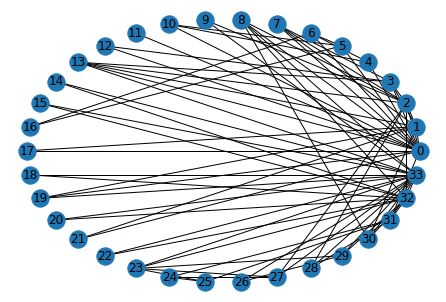

In [11]:
if isinstance(h3, dict): 
    h3 = [h3[n] for n in G_test]
    a3 = [a3[n] for n in G_test]

if isinstance(h, dict):
    h = [h[n] for n in G_test]
    a = [a[n] for n in G_test]

T = np.stack([h1, h3, h, a1, a3, a]).T
# assert np.allclose(h1, h3, atol=1e-5, rtol=1e-5)
# assert np.allclose(h3, h, atol=1e-5, rtol=1e-5)
# assert np.allclose(a1, a3, atol=1e-5, rtol=1e-5)
# assert np.allclose(a3, a, atol=1e-5, rtol=1e-5)

if G_test.order() < 50: 
    nx.draw(G_test, pos=nx.circular_layout(G_test), labels={k: k for k in G_test.nodes})

    
order = np.argsort(T[:,0])[::-1][:50]
T1 = T[order,:3]

order2 = np.argsort(T[:,3])[::-1][:50]
T2 = T[order2,3:]
T = np.concatenate([order.reshape(-1, 1), T1, order2.reshape(-1, 1), T2], axis=1)
print(tabulate.tabulate(T, headers=['Node #', 'Hub1', 'Hub3', 'Hub_nx', 'Node #', 'Aut1', 'Aut3', 'Aut_nx']))

In [12]:
algorithms = [nx.hits, hits]

ns = [100, 200, 400, 800, 1600, 3200]

graph_generators = [
    lambda n: nx.fast_gnp_random_graph(n, 0.04),
    lambda n: nx.gnm_random_graph(n, n*4, directed=True),
    lambda n: nx.erdos_renyi_graph(n, 0.04, directed=True),
    lambda n: nx.dual_barabasi_albert_graph(n, 10, 10, 0.4),
]
import time

times = []
from tqdm import tqdm
for n in tqdm(ns):
    graphs = [gen(n) for gen in graph_generators]
    running_time = []
    for algo in algorithms:
        t = []
        for g in graphs:
            t0 = time.time()
            h, a = algo(g)
            t.append(time.time() - t0)
        running_time.append(sum(t) / len(graphs))
    times.append(running_time)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:31<00:00, 15.20s/it]


---------  ---------  ----------
0.0186864  0.0533435  0.00419271
0.0364399  0.106256   0.0125257
0.101243   0.263778   0.0849053
0.333786   0.684995   0.323777
1.14007    1.87655    1.30337
4.4775     6.1299     4.9958
---------  ---------  ----------


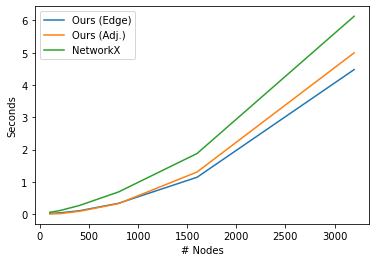

In [13]:
print(tabulate.tabulate(times))
times = np.array(times)
fig, ax = plt.subplots(1, 1)
ax.plot(ns, times[:,0], label="Ours (Edge)")
ax.plot(ns, times[:,2], label="Ours (Adj.)")
ax.plot(ns, times[:,1], label="NetworkX")
ax.set_xlabel("# Nodes")
ax.set_ylabel("Seconds")
ax.legend()

## Exercise 4 - HITS vs PageRank

Download the `cit-DBLP` dataset from the [citation dataset collection](http://networkrepository.com/cit.php) in the [Network Repository](http://networkrepository.com/networks.php).

1. Apply the PageRank and HITS algorithms on the `cit-DBLP` dataset.
2. HITS hubs value, HITS authorities value, PageRank value. Calculate the [Kullback-Liebler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) and  [Jensen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence) between each pair of distribution. What do you observe?


$$
{\displaystyle D_{\text{KL}}(P\parallel Q)=-\sum _{x\in {\mathcal {X}}}P(x)\log \left({\frac {Q(x)}{P(x)}}\right)}
$$

$$
{D_{\text{JS}}(P\parallel Q)=\frac{1}{2} D_{\text{KL}}(P\parallel M)+{\frac {1}{2}}D_{\text{KL}}(Q\parallel M)}\\
\text{where }M = \frac{1}{2}(P + Q)
$$

In [49]:
# Method will load a list of all pairs of nodes that are 
# connected to each other by an edge.
# Additionally, is will load precomputed positions for plotting nodes.
# It is, however, not a pretty plot but the computation is fun (also plotting will take forever and potentially melt your pc)
edges, pos = load_dblp_citations()
print("Number of edges: ", len(edges))
print("Number of nodes: ", len(pos))
print("Position example: ", pos[1])

Number of edges:  49743
Number of nodes:  12591
Position example:  [0.03738057 0.02658339]


In [64]:
# Full cit-DBLP graph. Very large and time-consuming.
G = nx.DiGraph()
G.add_edges_from(edges)

# Small test graph ideal for testing while implementing
G_test = nx.DiGraph()
G_test.add_edges_from([(0, 3), (1, 2), (1, 4), (2, 0), 
                  (3, 2), (4, 3), (4, 1), (4, 5), 
                  (4, 2), (5, 2), (5, 7), (6, 0),  
                  (6, 2), (7, 0)])
# nx.draw(G_test)


In [16]:
def kl(p1, p2): 
    # Four different formulations
    kl1 = -(p1 * (np.log(p2) - np.log(p1))).sum()
    kl2 = -(p1 * np.log(p2 / p1)).sum()
    kl3 =  (p1 * (np.log(p1) - np.log(p2))).sum()
    kl4 =  (p1 * np.log(p1 / p2)).sum()
    
#     assert np.allclose(kl1, kl2)
#     assert np.allclose(kl2, kl3)
#     assert np.allclose(kl3, kl4)
    
    return kl4

In [17]:
def js(p1, p2):
    m = 0.5 * (p1 + p2)
    return 0.5 * (kl(p1, m) + kl(p2, m)) 

In [57]:
### Compare authority, hubs and pagerank using kl and js divergence
p = my_pagerank(G_test)
h, a = hits(G_test)

# p = my_pagerank(G)
# h, a = hits(G)

divergences = [
    ['D_KL (P, A)', kl(p, a), 'D_KL(A, P)', kl(a, p), 'D_JS(A, P)', js(a, p)],
    ['D_KL (P, H)', kl(p, h), 'D_KL(H, P)', kl(h, p), 'D_JS(H, P)', js(h, p)],
    ['D_KL (H, A)', kl(h, a), 'D_KL(A, H)', kl(a, h), 'D_JS(A, H)', js(a, h)],
]

print(tabulate.tabulate(divergences))


-----------  -  ----------  -  ----------  -
D_KL (P, A)  0  D_KL(A, P)  0  D_JS(A, P)  0
D_KL (P, H)  0  D_KL(H, P)  0  D_JS(H, P)  0
D_KL (H, A)  0  D_KL(A, H)  0  D_JS(A, H)  0
-----------  -  ----------  -  ----------  -


In [ ]:
from scipy.spatial import distance

print("p, a", distance.jensenshannon(p, a)**2)  # For some reason, the scipy library computes squareroot of the JS-divergence as defined on Wiki.
print()
print("p, a", js(p, a))
print("a, p", js(a, p))
print()
print("p, h", js(p, h))
print("h, p", js(h, p))
print()
print("a, h", js(a, h))
print("h, a", js(h, a))

## Exercise 5 - PageRank problems

In this exercise, we study the effect of link farms on PageRank $\alpha = 0.85$ and HITS

1. Add a new node with an edge from the node with the lowest PageRank of the DBLP graph. Add 100 fake nodes with edges to and from this new node. Run PageRank and HITS and notice what changes. You may want to start with a smaller test-graph and fewer added nodes to speed up computation while implementing. 
2. Instead of the node with the lowest PageRank, connect the above node to the node with heighest PageRank - What do you notice? Why is that happening? 
3. Keep adding fake nodes until the new node has the highest PageRank and Authority score. 

[0.29627626 0.27182765 0.01999313 0.27441567 0.02349708 0.01999313
 0.04899708 0.015      0.015      0.015     ]
7 0.015000000000000003
0 0.29627625662975293


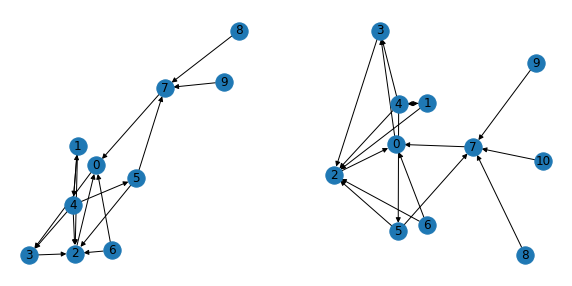

In [71]:


# G = nx.DiGraph()
# G.add_edges_from(edges)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

G = G_test.copy()
nx.draw(G, with_labels=True, ax=ax[0])

p = my_pagerank(G)

print(p)

lowest = np.argmin(p)
highest = np.argmax(p)
print(lowest, p[lowest])
print(highest, p[highest])

num_nodes = G.number_of_nodes()
# print(num_nodes)
G.add_edge(num_nodes, lowest)
nx.draw(G, with_labels=True, ax=ax[1])

G.add_edges_from([])



